# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
def get_crypto_data(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    response = requests.get(url,headers=headers)
    return response.json()["data"]

In [12]:
btc_data = get_crypto_data(btc_url)
btc_data

{'1': {'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'website_slug': 'bitcoin',
  'rank': 1,
  'circulating_supply': 18710543,
  'total_supply': 18710543,
  'max_supply': 21000000,
  'quotes': {'USD': {'price': 49759.0,
    'volume_24h': 57046967935,
    'market_cap': 925839705122,
    'percentage_change_1h': 0.51997578463038,
    'percentage_change_24h': -0.131352914455065,
    'percentage_change_7d': -13.2534842246294,
    'percent_change_1h': 0.51997578463038,
    'percent_change_24h': -0.131352914455065,
    'percent_change_7d': -13.2534842246294},
   'CAD': {'price': 60253.1731,
    'volume_24h': 69078173472.4915,
    'market_cap': 1121099298932.23,
    'percent_change_1h': 0.51997578463038,
    'percent_change_24h': -0.131352914455065,
    'percent_change_7d': -13.2534842246294}},
  'last_updated': 1621058047}}

In [15]:
eth_data = get_crypto_data(eth_url)
eth_data

{'1027': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'website_slug': 'ethereum',
  'rank': 2,
  'circulating_supply': 115879861,
  'total_supply': 115879861,
  'max_supply': 0,
  'quotes': {'USD': {'price': 4047.0,
    'volume_24h': 60474113875,
    'market_cap': 466506739790,
    'percentage_change_1h': 0.7165658891874,
    'percentage_change_24h': 4.81518114381463,
    'percentage_change_7d': 15.8426270885858,
    'percent_change_1h': 0.7165658891874,
    'percent_change_24h': 4.81518114381463,
    'percent_change_7d': 15.8426270885858},
   'CAD': {'price': 4900.5123,
    'volume_24h': 73228104491.2375,
    'market_cap': 564893011211.711,
    'percent_change_1h': 0.7165658891874,
    'percent_change_24h': 4.81518114381463,
    'percent_change_7d': 15.8426270885858}},
  'last_updated': 1621058357}}

In [18]:
# Fetch current BTC price
btc_price = btc_data['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_price = eth_data['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59710.80
The current value of your 5.3 ETH is $21449.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [23]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY") 
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [24]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69027661

In [25]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [26]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [35]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
value_data = {
    "amount": {
       "crypto": total_crypto,
       "shares": total_shares
    }
}

df_savings = pd.DataFrame(value_data)
df_savings
# Display savings DataFrame
display(df_savings)

,amount
crypto,81159.9
shares,43682.5


<AxesSubplot:title={'center':'Composition of Personal Saving'}, ylabel='amount'>

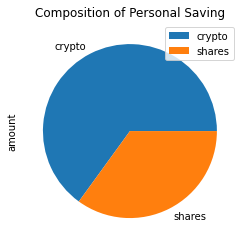

In [36]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Saving")

In [37]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-05-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-14', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257  241.20   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245  241.55   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625  241.33   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554  241.84   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270  241.96   

                                                             
                             high     low   close    volume  
time                                                         
2017-05-25 00:00:00-04:00  242.08  240.96  241.71  45278321  
2017-05-26 00:00:00-04:00  241.90  241.45  241.74  30002081  
2017-05-30 00:00:00-04:00  241.79  241.16  241.52  28437351  
2017-05-31 00:00:00-04:00  241.88  240.64  241.42  59140588  
2017-06-01 00:00:00-04:00  243.34  241.64  243.32  50837868

In [45]:
df_stock_data.shape

(1000, 10)

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.470  2241270   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-25 00:00:00-04:00          NaN  241.20  242.08  240.96  241.71   
2017-05-26 00:00:00-04:00     0.000183  241.55  241.90  241.45  241.74   
2017-05-30 00:00:00-04:00     0.001416  241.33  241.79  241.16  241.52   
2017-05-31 00:00:00-04:00     0.001049  241.84  241.88  240.64  241.42   
2017-06-01 00:00:00-04:00    -0.002551  241.96  243.34  241.64  243.32   

                                                  
                             volume daily_return  
time                                              
2017-05-25 00:00:00-04:00  45278321          NaN  
2017-05-26 00:00:00-04:00  30002081     0.000124  
2017-05-30 00:00:00-04:00  28437351    -0.000910  
2017-05-31 00:00:00-04:00  59140588    -0.000414  
2017-06-01 00:00:00-04:00  50837868     0.007870

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995912,1.002808,1.003493,0.994766,1.012027,1.010143,1.002932,0.985573,1.005372,1.010879,...,1.006735,0.999211,1.003037,1.007395,1.009649,0.999971,1.007784,1.008401,0.997802,1.004360
2,0.984876,1.004444,0.994848,0.982213,1.007204,1.018990,1.006160,0.989127,0.999183,1.008059,...,1.007657,1.009066,1.004518,1.002383,0.999169,0.992316,1.013790,0.999410,0.998586,0.995287
3,0.981448,0.997508,1.001676,0.984161,1.004098,1.025028,1.007550,0.990217,0.995410,1.011490,...,0.994355,1.006292,1.009459,0.999702,1.006826,1.002503,1.013163,1.005173,1.007898,1.012967
4,0.977857,1.012535,1.002560,0.990816,1.005316,1.021181,1.017379,0.994116,0.984286,1.015381,...,0.991328,1.012321,1.008389,0.992414,1.003821,1.012167,1.015495,1.003722,1.009826,1.008331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.001008,24.933125,24.329695,19.650439,15.584674,9.662015,68.481308,23.029176,16.249988,16.111142,...,19.817617,21.756774,13.283535,18.658898,113.275435,11.035244,6.875345,15.986099,12.469431,8.660659
7557,14.015804,25.047780,24.093059,19.636697,15.649725,9.661577,68.440890,23.009751,16.186678,16.270711,...,19.958592,21.813698,13.290126,18.600876,113.222430,11.077672,6.893608,15.899097,12.456606,8.663444
7558,14.177481,25.077434,24.010469,19.628238,15.463826,9.666542,68.236768,22.810459,16.209590,16.135033,...,20.139842,21.945277,13.240646,18.633513,114.101704,10.934850,6.850318,15.921919,12.516725,8.612488
7559,14.187061,25.066749,23.936733,19.780791,15.518130,9.655924,67.758964,22.607313,16.350503,15.961218,...,20.396838,21.953721,13.243114,18.786353,114.748857,10.982947,6.844731,15.863228,12.505640,8.675247


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

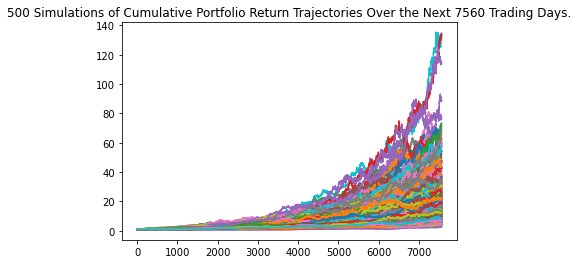

In [49]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

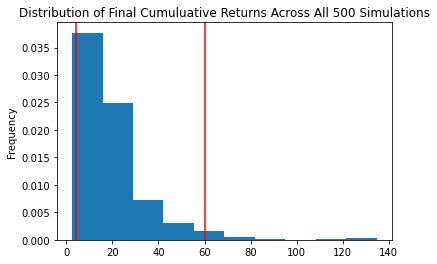

In [50]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             19.989590
std              15.745334
min               2.546697
25%               9.783112
50%              15.851306
75%              24.674609
max             134.633856
95% CI Lower      4.226146
95% CI Upper     60.147297
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84522.93 and $1202945.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [54]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $126784.39 and $1804418.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004573,0.989643,1.016155,1.020558,1.025520,1.000754,1.004466,1.002715,1.000576,1.001895,...,1.024442,1.003372,1.009361,0.980431,1.007910,1.004703,0.993387,1.002517,0.998931,0.984230
2,0.999394,1.000194,1.007998,1.037682,1.024847,1.014259,0.993074,1.013978,0.999231,0.999560,...,1.046545,0.996334,0.992859,0.973491,0.991791,1.007294,0.987861,0.996861,0.985429,0.978400
3,0.993961,0.981714,1.007534,1.036903,1.016007,1.025625,1.023132,1.003559,0.989254,0.975958,...,1.046864,0.997138,0.992398,0.976310,0.979447,1.017968,0.984839,0.989580,0.980500,0.985663
4,1.003847,0.975313,1.016968,1.048062,1.024111,1.046952,1.008466,0.992054,1.003469,0.977221,...,1.052039,0.994103,0.996295,0.985358,0.981067,1.020584,0.990182,0.990358,0.993906,1.001803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.922145,1.515995,4.305792,2.022192,1.548381,1.368145,1.446770,2.191181,1.311314,1.234533,...,1.064028,1.565915,1.736897,1.685838,1.007157,1.595940,1.619537,1.269225,1.542142,3.434317
1257,1.935695,1.543800,4.287888,2.023638,1.551806,1.358315,1.471050,2.198869,1.309859,1.247958,...,1.068892,1.565574,1.745070,1.683607,1.001757,1.604043,1.625314,1.245713,1.537417,3.420097
1258,1.918547,1.563283,4.316584,2.051973,1.545969,1.359742,1.449706,2.176119,1.303069,1.252611,...,1.071214,1.584422,1.773660,1.667824,1.016297,1.594755,1.616027,1.232451,1.565587,3.409430
1259,1.896190,1.572965,4.286429,2.056518,1.552548,1.366146,1.470643,2.155736,1.314729,1.244431,...,1.058658,1.594938,1.767549,1.665278,1.018625,1.598915,1.608519,1.220340,1.592674,3.426784


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

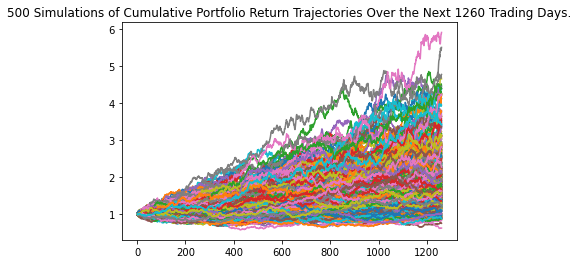

In [57]:
# Plot simulation outcomes
MC_stocks_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

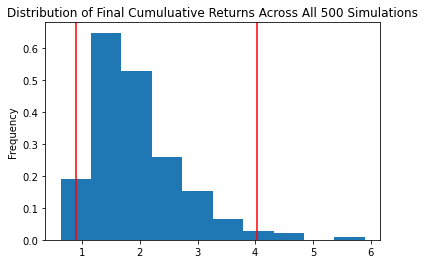

In [58]:
# Plot probability distribution and confidence intervals
MC_stocks_5.plot_distribution()

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_five_yrs = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
print(summary_five_yrs)

count           500.000000
mean              1.946246
std               0.775397
min               0.624949
25%               1.409340
50%               1.785826
75%               2.267654
max               5.900854
95% CI Lower      0.895963
95% CI Upper      4.031056
Name: 1260, dtype: float64


In [66]:
##### Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_five_yrs[8]*initial_investment, 2)
ci_upper_five = round(summary_five_yrs[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53757.76 and $241863.33


### Ten Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [64]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000710,0.996990,1.000461,0.999417,0.996143,1.008351,0.995407,1.007281,0.995164,0.999923,...,0.998492,1.011926,0.992298,1.011271,1.008334,1.002205,1.008263,0.998249,1.004477,1.010535
2,0.991460,1.018090,0.997884,0.991683,1.009469,1.005665,1.011764,1.006905,0.998362,1.002586,...,0.985218,1.000035,0.998955,1.007970,1.003035,1.010837,1.007053,0.996849,1.021211,1.015931
3,0.990297,1.026046,0.999389,0.980794,1.015425,1.006793,1.015736,0.992246,0.990658,1.005762,...,0.976507,1.004439,1.009766,1.022243,1.012805,1.012242,1.012019,0.983645,1.022017,1.009625
4,1.003517,1.036728,0.983650,0.989147,1.040608,1.017657,1.023182,0.988490,0.999386,1.012500,...,0.965403,1.005334,1.012945,1.028846,1.037439,1.024419,1.000078,0.990781,1.020285,1.018411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.764856,3.260410,3.971663,2.986662,1.124334,4.168855,4.512504,3.917469,2.948997,11.396249,...,5.871858,2.128274,1.744484,3.850591,3.599735,3.299668,3.085361,5.973064,5.447772,0.971986
2517,3.759467,3.277587,3.954231,3.015635,1.118588,4.170361,4.507906,3.911107,2.938358,11.587848,...,5.922899,2.166979,1.725649,3.811206,3.577613,3.277630,3.079037,5.943975,5.460566,0.980939
2518,3.790243,3.195383,3.948539,3.052639,1.118281,4.147325,4.576678,3.946129,2.964316,11.585036,...,5.874886,2.152551,1.707203,3.798629,3.539433,3.336201,3.099095,6.052343,5.483840,0.973741
2519,3.784690,3.202485,3.959572,3.076984,1.122580,4.054893,4.578248,3.996785,3.012416,11.601287,...,5.938064,2.109861,1.698281,3.844026,3.565071,3.307628,3.083552,5.942651,5.520040,0.961739


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

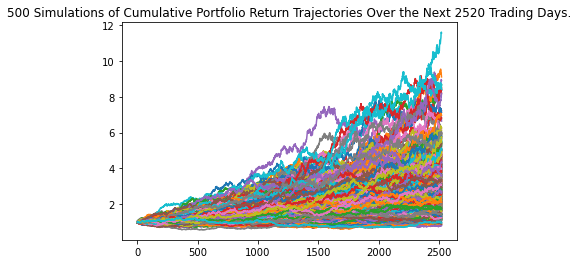

In [67]:
# Plot simulation outcomes
MC_stocks_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

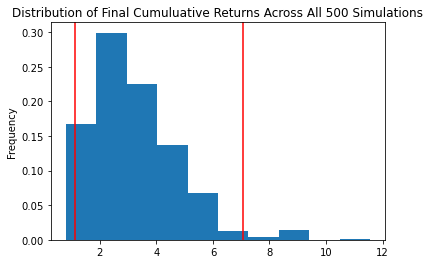

In [68]:
# Plot probability distribution and confidence intervals
MC_stocks_10.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten_yrs = MC_stocks_10.summarize_cumulative_return()


# Print summary statistics
print(summary_ten_yrs)

count           500.000000
mean              3.231096
std               1.552921
min               0.796127
25%               2.104738
50%               2.944622
75%               4.052940
max              11.559935
95% CI Lower      1.138127
95% CI Upper      7.049398
Name: 2520, dtype: float64


In [70]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten_yrs[8]*initial_investment, 2)
ci_upper_ten = round(summary_ten_yrs[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68287.62 and $422963.9
